# Nobel Laureates
The Nobel Foundation has made a dataset available of all prize winners from the start of the prize, in 1901, to 2016. Let's load it in and take a look.

The main goal of this project to show data manipulation and visualization skills with pandas and seaborn.

In [32]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
nobel = pd.read_csv('data_files/nobel_laureates.csv')
nobel.head(3)

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany


### Look at all winners in the dataset which sex and which country is the most commonly represented?

In [11]:
display('Total number of Nobel Prizes: {}'.format(len(nobel)))
display(nobel['Sex'].value_counts())
nobel['Birth Country'].value_counts().head(10)

'Total number of Nobel Prizes: 969'

Male      893
Female     50
Name: Sex, dtype: int64

United States of America    276
United Kingdom               88
Germany                      70
France                       53
Sweden                       30
Japan                        29
Russia                       20
Netherlands                  19
Canada                       18
Italy                        18
Name: Birth Country, dtype: int64

The most common Nobel laureate was a man from the United States of America. 
#### When did the USA start to dominate?

In [51]:
nobel['USA Born Winner'] = nobel['Birth Country'] == 'United States of America'
nobel['Decade'] = (np.floor(nobel['Year'] / 10) * 10).astype('int64')
prop_usa_winners = nobel.groupby('Decade', as_index=False)['USA Born Winner'].mean()

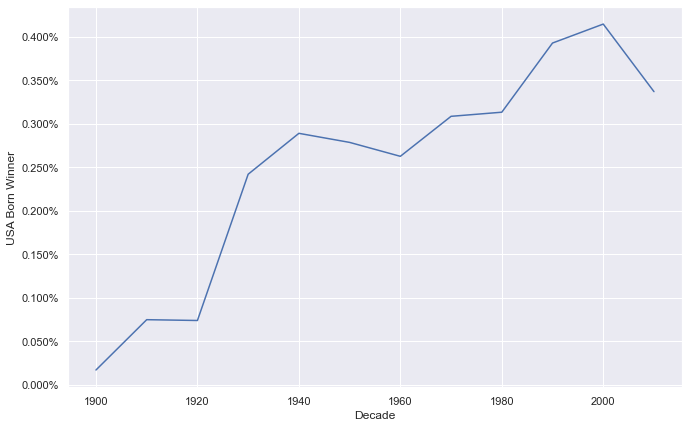

In [52]:
sns.set()
plt.rcParams['figure.figsize'] = [11, 7]

ax = sns.lineplot(data=prop_usa_winners, x='Decade', y='USA Born Winner')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

So the USA became the dominating winner in 1930s and keep the leading positions.
#### What is the gender of a typical winner?

In [53]:
nobel['Female Winner'] = nobel['Sex'] == 'Female'
prop_female_winners = nobel.groupby(['Decade', 'Category'], as_index=False)['Female Winner'].mean()

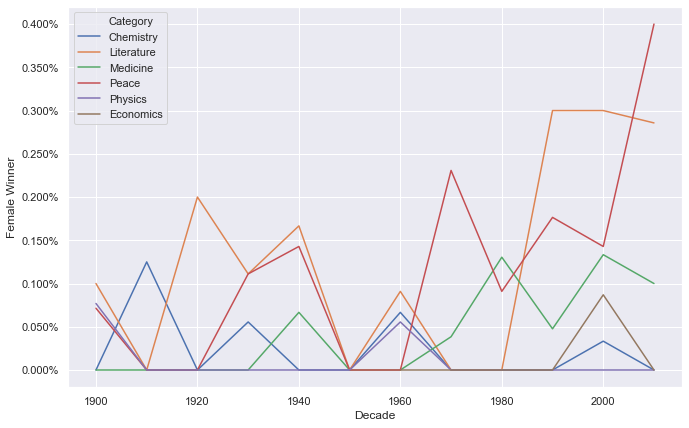

In [54]:
ax = sns.lineplot(data=prop_female_winners, x='Decade', y='Female Winner', hue='Category')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

Who was the first woman to receive a Nobel Prize? And in what category?

In [63]:
nobel[nobel['Female Winner'] == True].nsmallest(n=1, columns='Year')

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,...,Organization Country,Death Date,Death City,Death Country,usa_born_winner,decade,female_winner,Decade,USA Born Winner,Female Winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,NaN,1934-07-04,Sallanches,France,False,1900,True,1900,False,True


### Who gotten the Prize more than once?